In [85]:
import pandas as pd

In [86]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
for column in data.columns:
    print(data[column].value_counts())
    

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: count, Length: 136, dtype: int64
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64
SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
2

* issues include:
* pregnancies (some very high [ex.17])
* blood pressure (value = 0)
* skin thickness (value = 0)
* insulin (value = 0)
* BMI (value = 0)

In [22]:
import numpy as np

In [35]:
to_replace_columns = data_cleaned[['Glucose', 'BloodPressure', 'BMI']]

for column in to_replace_columns:
    data[column] = data_cleaned[column].replace(0, np.nan)
    data[column].fillna(data_cleaned[column].mean(), inplace=True)

In [36]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,20.536458,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,15.952218,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,23.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

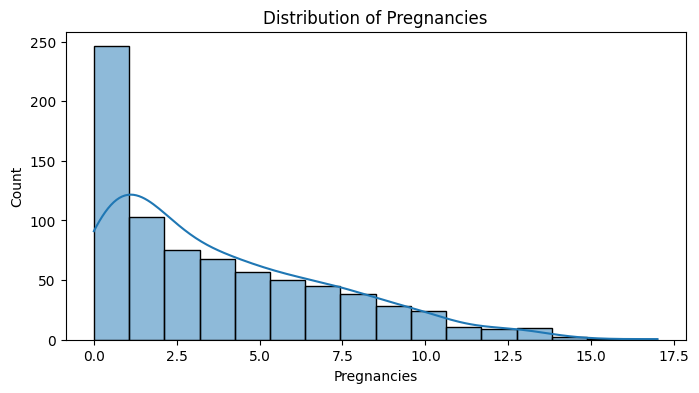

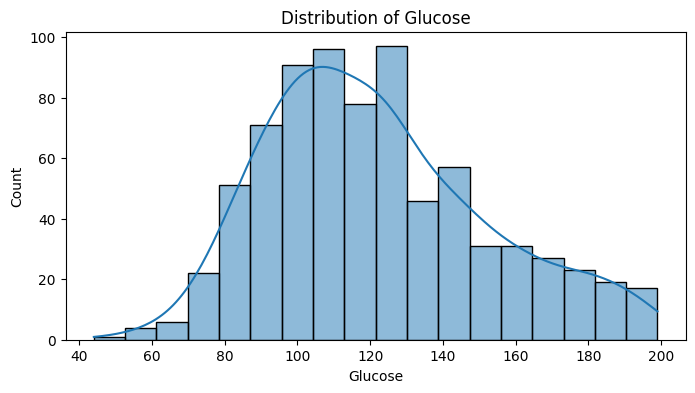

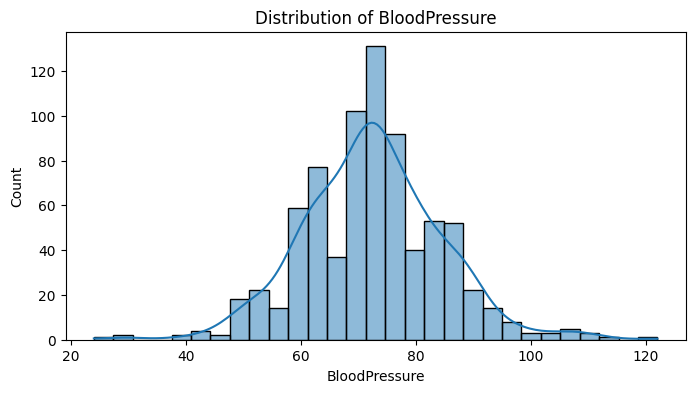

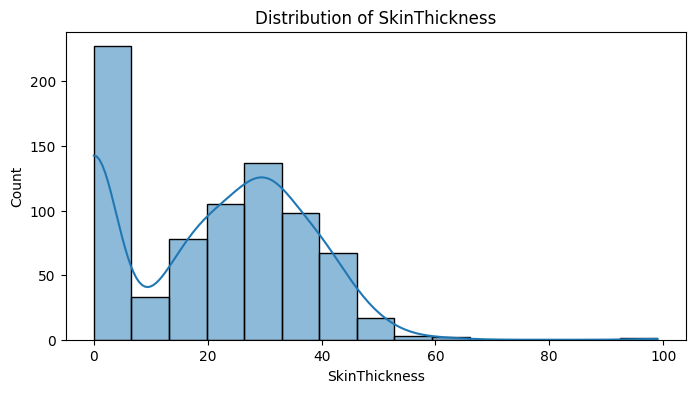

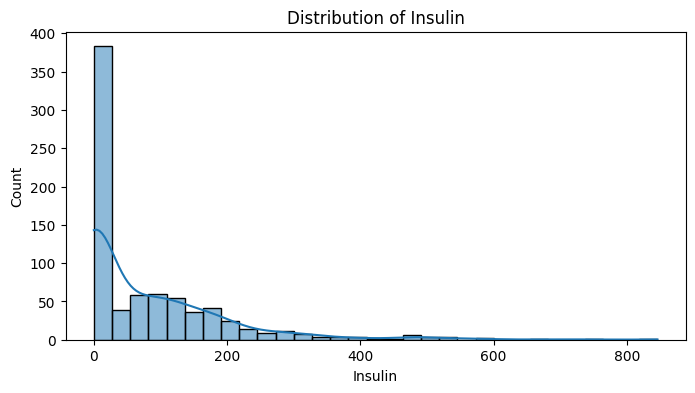

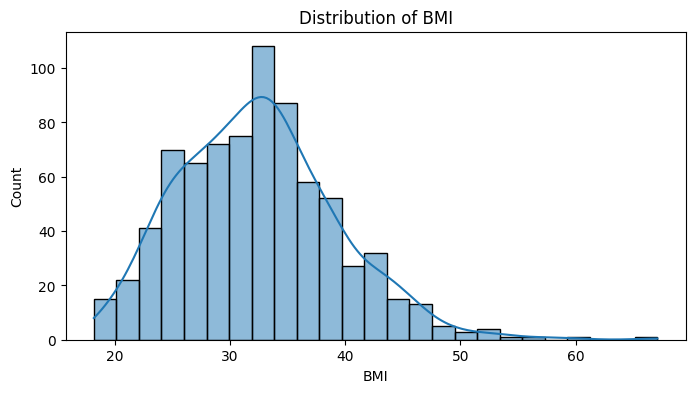

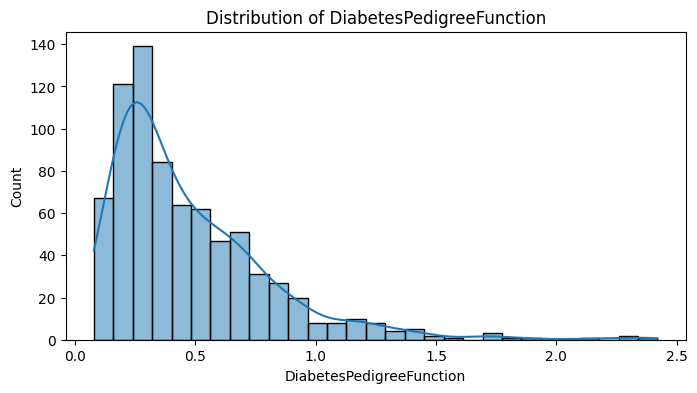

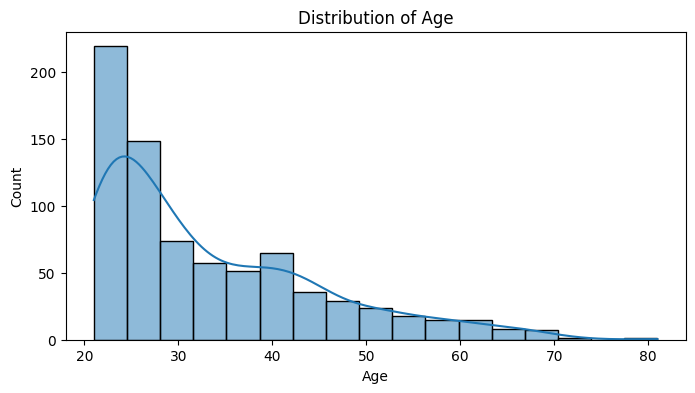

In [37]:
for column in data.columns.drop(['Outcome']):
    plt.figure(figsize=(8,4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

* Skin thickness and insulin must be preprocessed differently
* Skin thickness by KNN ( didnt work) try normal distribution?
* Insulin by regression (insulin x glucose)

In [38]:
from sklearn.impute import KNNImputer

In [87]:
data['SkinThickness'] = data['SkinThickness'].mask(data['SkinThickness'] == 0, np.nan)
data['Insulin'] = data['Insulin'].mask(data['Insulin'] == 0, np.nan)

### v doesnt work

In [74]:
# Assuming 'data' is your DataFrame
imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed

# Reshape the column to 2D array (required by KNNImputer)
skin_thickness_values = data['SkinThickness'].values.reshape(-1, 1)

# Perform KNN imputation
imputed_skin_thickness = imputer.fit_transform(skin_thickness_values)

# Replace the imputed values back into the DataFrame
data['SkinThickness'] = imputed_skin_thickness

# Optionally, convert the column back to the original type (e.g., int)
data['SkinThickness'] = data['SkinThickness'].astype(int)

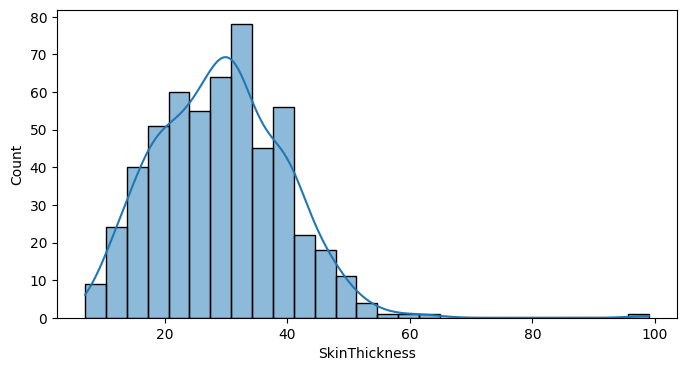

In [88]:
plt.figure(figsize=(8,4))
sns.histplot(data['SkinThickness'], kde=True)
plt.show()

### ^ doesnt work

In [89]:
data['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [91]:
avg = 29.108073
std = 10.476982

random_values = np.random.normal(loc=avg, scale=std, size=data['SkinThickness'].isnull().sum())
data.loc[data['SkinThickness'].isnull(), 'SkinThickness'] = random_values

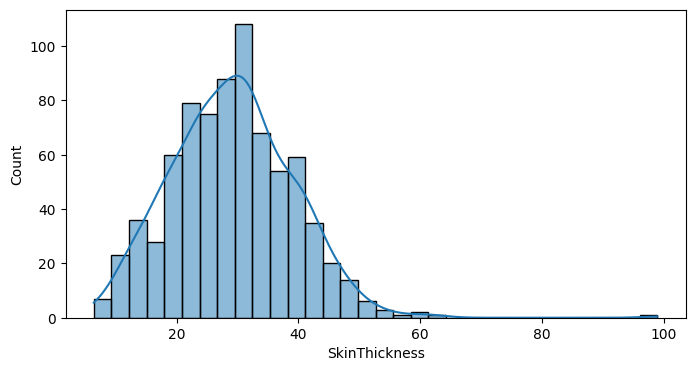

In [93]:
plt.figure(figsize=(8,4))
sns.histplot(data['SkinThickness'], kde=True)
plt.show()

In [94]:
data['SkinThickness'].describe()

count    768.000000
mean      29.148457
std       10.015755
min        6.381540
25%       22.157179
50%       29.000000
75%       35.707757
max       99.000000
Name: SkinThickness, dtype: float64

* done with skin thickness

In [98]:
from sklearn.linear_model import LinearRegression

In [100]:
# Assuming 'data' is your DataFrame
target_column = 'Insulin'
predictor_column = 'Glucose'

# Create a DataFrame without missing values in both 'Glucose' and 'Insulin' columns
data_no_missing = data.dropna(subset=[target_column, predictor_column])

# Separate predictors and target variable
X_train = data_no_missing[[predictor_column]]
y_train = data_no_missing[target_column]

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Identify rows with missing values in the 'Insulin' column
missing_rows = data[target_column].isnull()

# Use the trained model to predict missing values
X_test = data.loc[missing_rows, [predictor_column]]
predicted_values = model.predict(X_test)

# Fill in missing values in the 'Insulin' column with predicted values
data.loc[missing_rows, target_column] = predicted_values

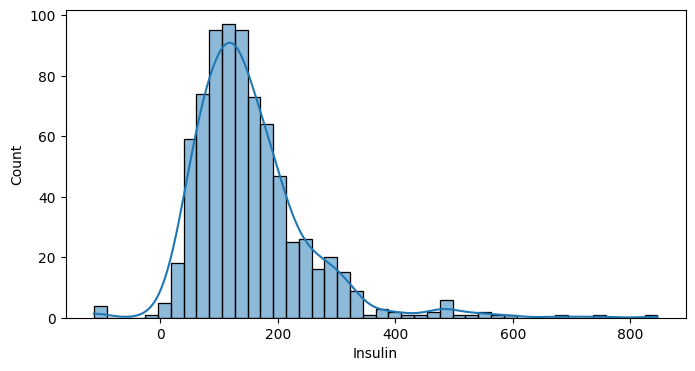

In [102]:
plt.figure(figsize=(8,4))
sns.histplot(data['Insulin'], kde=True)
plt.show()

# Scaling

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [111]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)

In [112]:
data_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.308993,0.338693,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.244211,0.194520,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.160131,0.418790,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.179429,0.215698,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.308993,0.292877,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.449354,0.305392,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.222617,0.279193,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.179429,0.234471,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.225561,0.288347,0.448584,0.115713,0.433333,1.0


In [116]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

* for the 2 ML models I will do
* random forest
* logistic regression (need a undersampled majority class)

In [117]:
data_scaled.to_csv('random_forest_ready.csv')

In [119]:
from sklearn.utils import resample

# Assuming 'df' is your DataFrame with 'Outcome' as the target variable
# Separate majority and minority classes
data_scaled_majority = data_scaled[data_scaled['Outcome'] == 0]
data_scaled_minority = data_scaled[data_scaled['Outcome'] == 1]

# Determine the desired number of samples in the majority class after undersampling
desired_majority_samples = len(data_scaled_minority)

# Undersample the majority class
data_scaled_majority_undersampled = resample(data_scaled_majority, replace=False, n_samples=desired_majority_samples, random_state=42)

# Concatenate the undersampled majority class with the minority class
data_scaled_balanced = pd.concat([data_scaled_majority_undersampled, data_scaled_minority])

# Display the class distribution after undersampling
print(data_scaled_balanced['Outcome'].value_counts())

Outcome
0.0    268
1.0    268
Name: count, dtype: int64


In [120]:
data_scaled_balanced.to_csv('log_reg_ready.csv')